# Modeling: Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
data = pd.read_csv('ObesityDataset.csv')
print(data.head())

   Gender   Age family_history_with_overweight FAVC  FCVC  NCP       CAEC  \
0  Female  21.0                            yes   no   2.0  3.0  Sometimes   
1  Female  21.0                            yes   no   3.0  3.0  Sometimes   
2    Male  23.0                            yes   no   2.0  3.0  Sometimes   
3    Male  27.0                             no   no   3.0  3.0  Sometimes   
4    Male  22.0                             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overwe

# 1.1 Data preparation for modeling

## Train-test split

In [3]:
CSV_PATH = "ObesityDataset.csv"  
data = pd.read_csv(CSV_PATH)

print(data)

      Gender        Age family_history_with_overweight FAVC  FCVC  NCP  \
0     Female  21.000000                            yes   no   2.0  3.0   
1     Female  21.000000                            yes   no   3.0  3.0   
2       Male  23.000000                            yes   no   2.0  3.0   
3       Male  27.000000                             no   no   3.0  3.0   
4       Male  22.000000                             no   no   2.0  1.0   
...      ...        ...                            ...  ...   ...  ...   
2106  Female  20.976842                            yes  yes   3.0  3.0   
2107  Female  21.982942                            yes  yes   3.0  3.0   
2108  Female  22.524036                            yes  yes   3.0  3.0   
2109  Female  24.361936                            yes  yes   3.0  3.0   
2110  Female  23.664709                            yes  yes   3.0  3.0   

           CAEC SMOKE      CH2O  SCC       FAF       TUE        CALC  \
0     Sometimes    no  2.000000   no  0

In [4]:
TARGET_COL = "NObeyesdad" 

X = data.drop(columns=[TARGET_COL])
y = data[TARGET_COL]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

In [5]:
print(f"Size of data original{X.shape}")
print(f"Size of label original{y.shape}")

print(f"Size of data train{X_train.shape}")
print(f"Size of label train{y_train.shape}")
print(f"Size of data test{X_test.shape}")
print(f"Size of label test{y_test.shape}")


Size of data original(2111, 14)
Size of label original(2111,)
Size of data train(1688, 14)
Size of label train(1688,)
Size of data test(423, 14)
Size of label test(423,)


In [6]:
import numpy as np

def random_state(seed=42):
    np.random.seed(seed)
    
random_state(42)


## Preprocessing:

In [7]:
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
print(f"Num_cols {num_cols}")
cat_cols = [c for c in X_train.columns if c not in num_cols]
print(f"Cat_cols {cat_cols}")

numeric_tf = Pipeline(steps=[
    ("scaler", StandardScaler()),
])

categorical_tf = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ],
    remainder="drop",
)

Num_cols ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Cat_cols ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [8]:
print(f"preprocess{preprocess}")

preprocessColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])


In [9]:
print(X_train)

      Gender        Age family_history_with_overweight FAVC      FCVC  \
459     Male  19.000000                            yes  yes  2.000000   
426     Male  22.000000                             no   no  2.000000   
326     Male  18.000000                            yes  yes  3.000000   
971     Male  19.506389                            yes  yes  2.793561   
892   Female  17.085250                             no  yes  1.972545   
...      ...        ...                            ...  ...       ...   
90    Female  25.000000                             no   no  3.000000   
1439  Female  40.654155                            yes  yes  2.000000   
609     Male  19.979810                            yes  yes  2.000000   
1589    Male  38.523646                            yes  yes  2.177896   
478     Male  19.000000                             no  yes  2.000000   

           NCP        CAEC SMOKE      CH2O  SCC       FAF       TUE  \
459   3.000000  Frequently    no  3.000000   no  1.0

## 1.2 Build classification models

+ Sử dụng model:
    + Logistic Regression: là một phương pháp thống kê được sử dụng để mô hình hóa và dự đoán xác suất xảy ra của một biến phụ thuộc nhị phân (có hai lựa chọn: 0 hoặc 1) dựa trên các biến độc lập.
    
    + Decision Tree: Trong lý thuyết quyết định, một cây quyết định là một đồ thị của các quyết định và các hậu quả có thể của nó. Cây quyết định được sử dụng để xây dựng một kế hoạch nhằm đạt được mục tiêu mong muốn. Các cây quyết định được dùng để hỗ trợ quá trình ra quyết định. Cây quyết định là một dạng đặc biệt của cấu trúc cây.

    + Random Forest: Rừng ngẫu nhiên hoặc rừng quyết định ngẫu nhiên là một phương pháp học tập tổng hợp để phân loại, hồi quy và các nhiệm vụ khác hoạt động bằng cách tạo ra vô số cây quyết định trong quá trình đào tạo. Đối với các nhiệm vụ phân loại, đầu ra của rừng ngẫu nhiên là lớp được hầu hết các cây chọn.

    + K-Nearest Neighbor: Trong thống kê, giải thuật k hàng xóm gần nhất là một phương pháp thống kê phi tham số được đề xuất bởi Thomas M. Cover để sử dụng cho phân loại bằng thống kê và phân tích hồi quy. Cụm từ hàng xóm có thể hiểu là láng giềng hoặc lân cận.

In [10]:
random_state(42)
models = {
    "logistic_regresion": LogisticRegression(max_iter=2000, random_state=42),
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "random_forest": RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1),
    "knn": KNeighborsClassifier(n_neighbors=3),
}

In [11]:
print(models.items())

dict_items([('logistic_regresion', LogisticRegression(max_iter=2000, random_state=42)), ('decision_tree', DecisionTreeClassifier(random_state=42)), ('random_forest', RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)), ('knn', KNeighborsClassifier(n_neighbors=3))])


## 1.3 Model outputs for evaluation

In [12]:
def evaluate(pipe: Pipeline, X_test, y_test):
    y_pred = pipe.predict(X_test)
    #print(y_pred)
    #print(y_test)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_test)
        # print(f"Test acc {y_proba}")
        #print(y_proba)
        auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
    else:
        y_proba = None
        auc = np.nan

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    print(f"Report model{report}")
    macro_p = report["macro avg"]["precision"]
    macro_r = report["macro avg"]["recall"]
    macro_f1 = report["macro avg"]["f1-score"]
    cm = confusion_matrix(y_test, y_pred)

    return {
        "acc": acc,
        "macro_p": macro_p,
        "macro_r": macro_r,
        "macro_f1": macro_f1,
        "macro_auc_ovr": auc,
        "cm": cm,
    }

# 2. Evaluate

In [29]:
def train_test(models, X_train, y_train, X_test, y_test):
    results = []
    trained = {}
    confusion_matrix = {}
    for name, model in models.items():
        pipe = Pipeline(steps=[
            ("preprocess", preprocess),
            ("clf", model),
        ])
        pipe.fit(X_train, y_train)
        
        
        metrics = evaluate(pipe, X_test, y_test)
        trained[name] = pipe

        results.append({
            "model": name,
            "acc": metrics["acc"],
            "macro_p": metrics["macro_p"],
            "macro_r": metrics["macro_r"],
            "macro_f1": metrics["macro_f1"],
            "macro_auc_ovr": metrics["macro_auc_ovr"],
        })
        confusion_matrix[name] = metrics["cm"]
    return trained, results, confusion_matrix


### 2.1 Train and test

In [30]:
model_trained, results, cm = train_test(models, X_train, y_train, X_test, y_test)
results_df = pd.DataFrame(results).sort_values(by="macro_f1", ascending=False)

Report model{'Insufficient_Weight': {'precision': 0.5909090909090909, 'recall': 0.7222222222222222, 'f1-score': 0.65, 'support': 54.0}, 'Normal_Weight': {'precision': 0.5476190476190477, 'recall': 0.39655172413793105, 'f1-score': 0.46, 'support': 58.0}, 'Obesity_Type_I': {'precision': 0.5425531914893617, 'recall': 0.7285714285714285, 'f1-score': 0.6219512195121951, 'support': 70.0}, 'Obesity_Type_II': {'precision': 0.5760869565217391, 'recall': 0.8833333333333333, 'f1-score': 0.6973684210526315, 'support': 60.0}, 'Obesity_Type_III': {'precision': 0.9014084507042254, 'recall': 0.9846153846153847, 'f1-score': 0.9411764705882353, 'support': 65.0}, 'Overweight_Level_I': {'precision': 0.6428571428571429, 'recall': 0.46551724137931033, 'f1-score': 0.54, 'support': 58.0}, 'Overweight_Level_II': {'precision': 0.4375, 'recall': 0.1206896551724138, 'f1-score': 0.1891891891891892, 'support': 58.0}, 'accuracy': 0.624113475177305, 'macro avg': {'precision': 0.6055619828715154, 'recall': 0.614500141

In [31]:
print(cm)

{'logistic_regresion': array([[39,  6,  2,  2,  1,  3,  1],
       [16, 23,  3,  3,  2,  8,  3],
       [ 4,  1, 51,  9,  2,  0,  3],
       [ 1,  0,  4, 53,  0,  1,  1],
       [ 1,  0,  0,  0, 64,  0,  0],
       [ 1,  9, 10,  9,  1, 27,  1],
       [ 4,  3, 24, 16,  1,  3,  7]]), 'decision_tree': array([[45,  5,  0,  0,  1,  1,  2],
       [ 9, 28, 11,  0,  0,  3,  7],
       [ 2,  5, 54,  2,  0,  4,  3],
       [ 0,  1,  2, 51,  0,  2,  4],
       [ 0,  1,  0,  0, 64,  0,  0],
       [ 4,  5,  7,  1,  1, 38,  2],
       [ 2,  6, 12,  0,  0,  4, 34]]), 'random_forest': array([[49,  4,  0,  0,  0,  1,  0],
       [ 1, 48,  2,  0,  0,  6,  1],
       [ 0,  4, 58,  2,  0,  3,  3],
       [ 0,  4,  0, 55,  0,  0,  1],
       [ 0,  1,  0,  0, 64,  0,  0],
       [ 1,  7,  5,  0,  0, 45,  0],
       [ 2,  3,  5,  2,  0,  1, 45]]), 'knn': array([[51,  1,  0,  2,  0,  0,  0],
       [11, 20,  9,  4,  1,  8,  5],
       [ 1,  2, 59,  3,  0,  4,  1],
       [ 0,  1,  1, 53,  0,  2,  3],
     

### Report

In [32]:
print(results_df)

                model       acc   macro_p   macro_r  macro_f1  macro_auc_ovr
2       random_forest  0.860520  0.866419  0.859510  0.861153       0.979760
3                 knn  0.770686  0.761803  0.766021  0.753713       0.922992
1       decision_tree  0.742317  0.743070  0.737645  0.737551       0.847304
0  logistic_regresion  0.624113  0.605562  0.614500  0.585669       0.885143


### Visualize Confusion Matrix

#### 1. Confusion Matrix random_forest

Confusion Matrix Random Forest:


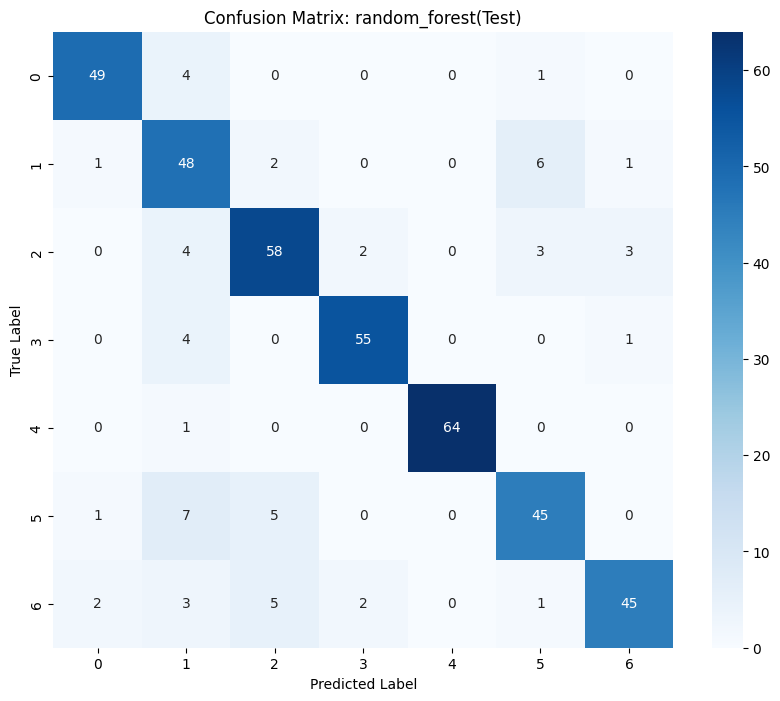

In [58]:
print("Confusion Matrix Random Forest:")
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm["random_forest"], annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {"random_forest"}(Test)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### 2 Confusion Matrix KNN

Confusion Matrix KNN:


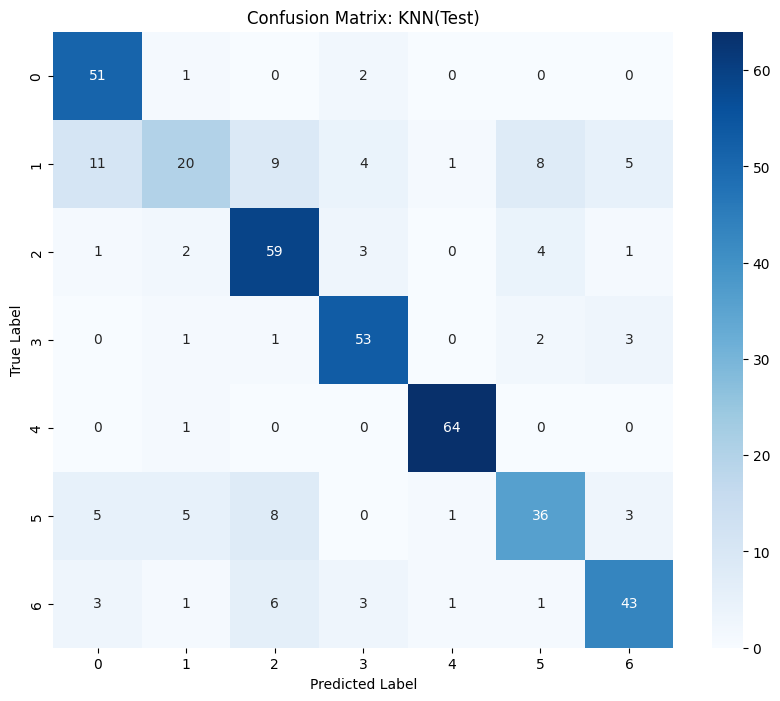

In [61]:
print("Confusion Matrix KNN:")
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm["knn"], annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {"KNN"}(Test)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### 3. Confusion Matrix Decision Tree

Confusion Matrix Decision Tree:


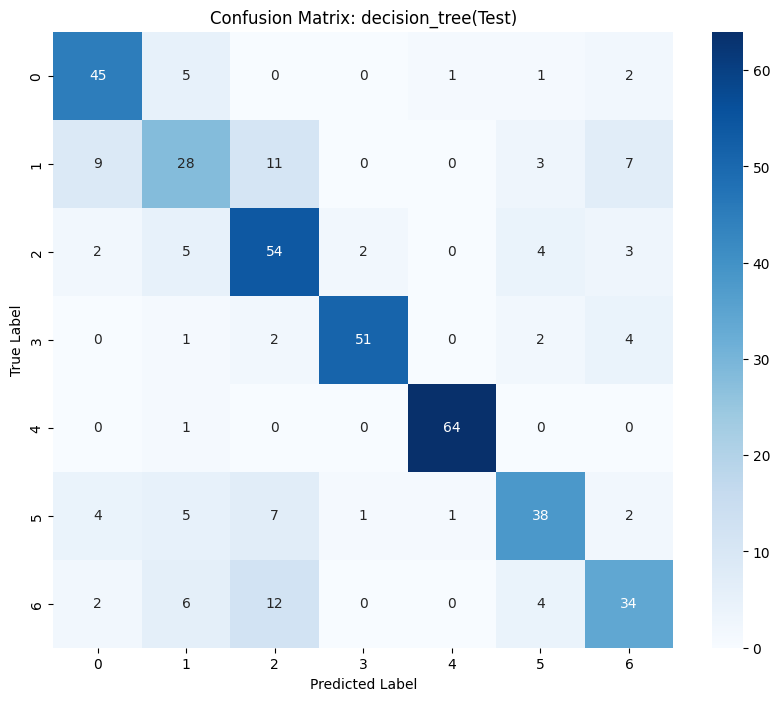

In [62]:
print("Confusion Matrix Decision Tree:")
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm["decision_tree"], annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {"decision_tree"}(Test)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### 4. Confusion Matrix Logistic Regresion

Confusion Matrix Logistic Regresion:


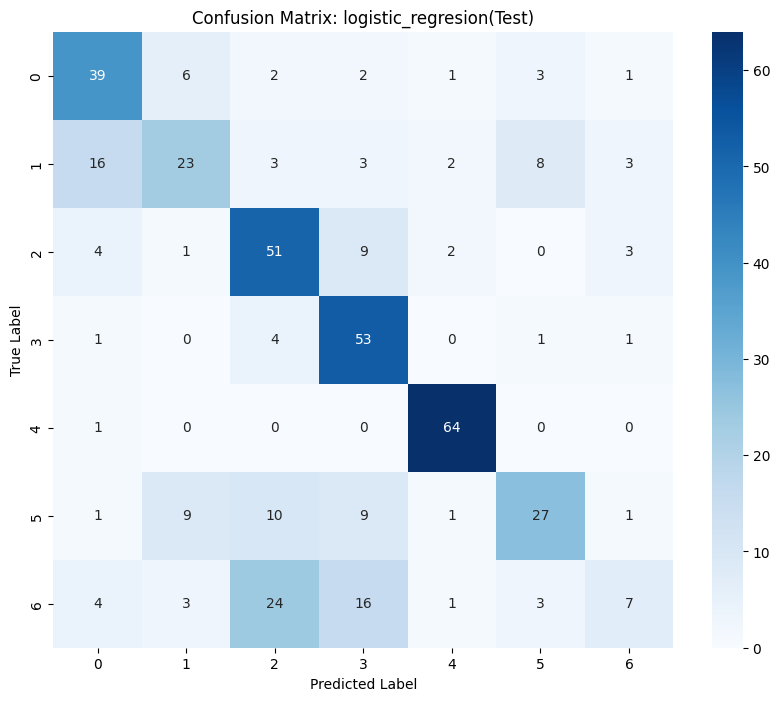

In [63]:
print("Confusion Matrix Logistic Regresion:")
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm["logistic_regresion"], annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {"logistic_regresion"}(Test)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Model Save Pipeline

In [64]:
import joblib
best_name = results_df.iloc[0]["model"]
best_pipe = model_trained[best_name]
joblib.dump(best_pipe, f"{best_name}_best_model.joblib")
print("Saved:", best_name, "-> best_model.joblib")

Saved: random_forest -> best_model.joblib


# Save order preprocessing

In [66]:
import json, joblib


meta = {
  "features": X.columns.tolist(),
  "num_cols": num_cols,
  "cat_cols": cat_cols,
  "cat_options": {c: sorted(X[c].unique().tolist()) for c in cat_cols},
  "num_ranges": {c: [float(X[c].min()), float(X[c].max()), float(X[c].median())] for c in num_cols},
}
with open("meta.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)


# Predict

In [69]:
import json
import joblib
import pandas as pd

MODEL_PATH = "random_forest_best_model.joblib"
META_PATH  = "meta.json"

model = joblib.load(MODEL_PATH)

with open(META_PATH, "r", encoding="utf-8") as f:
    meta = json.load(f)

FEATURES = meta["features"]
NUM_COLS = meta["num_cols"]
CAT_COLS = meta["cat_cols"]
CAT_OPTS = meta["cat_options"]
NUM_RNG  = meta["num_ranges"]

def predict(*inputs):
   
    row = {}
    idx = 0

    # categorical trước
    for c in CAT_COLS:
        row[c] = inputs[idx]
        idx += 1

    # numeric sau
    for c in NUM_COLS:
        row[c] = float(inputs[idx])
        idx += 1

    # đảm bảo đúng thứ tự cột
    X1 = pd.DataFrame([row], columns=FEATURES)

    pred = model.predict(X1)[0]


    return str(pred)


In [70]:
print(f"check feature: {FEATURES}, num_cols: {NUM_COLS}, cat: {CAT_COLS}, cat_ops: {CAT_OPTS}, num: {NUM_RNG}")

check feature: ['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'], num_cols: ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], cat: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], cat_ops: {'Gender': ['Female', 'Male'], 'family_history_with_overweight': ['no', 'yes'], 'FAVC': ['no', 'yes'], 'CAEC': ['Always', 'Frequently', 'Sometimes', 'no'], 'SMOKE': ['no', 'yes'], 'SCC': ['no', 'yes'], 'CALC': ['Always', 'Frequently', 'Sometimes', 'no'], 'MTRANS': ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']}, num: {'Age': [14.0, 61.0, 22.77789], 'FCVC': [1.0, 3.0, 2.385502], 'NCP': [1.0, 4.0, 3.0], 'CH2O': [1.0, 3.0, 2.0], 'FAF': [0.0, 3.0, 1.0], 'TUE': [0.0, 2.0, 0.62535]}
